In [521]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [522]:
data = pd.read_csv("NextOptimisation.csv")

In [523]:
data = data.drop(['Exchange ID'], axis=1)

In [524]:
data.columns = ['IO', 'LI', 'CW', 'CH','AdPosition', 'Exchange', 'Environment', 'Device', 'Impressions','mImpressions',
                'vImpressions', 'Clicks','Spend']

In [525]:
#convert integer into string
data.CW = data.CW.apply(str)
data.CH = data.CH.apply(str)

In [526]:
data["Size"] = data.CW + "x" + data.CH
data["Viewability"] = data.vImpressions / data.mImpressions
data["CTR"] = data.Clicks / data.Impressions

In [527]:
data.Exchange = data.Exchange.astype("category")
data.Environment = data.Environment.astype("category")
data.Device = data.Device.astype("category")
data.Size = data.Size.astype("category")
data.AdPosition = data.AdPosition.astype("category")

In [528]:
data.CTR[data.CTR == np.inf] = 0

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [529]:
X = data.loc[:, ["AdPosition", "Exchange", "Environment", "Device", "Size", "Viewability"]].values
y = data.loc[:, ["CTR"]].values

In [530]:
from sklearn.preprocessing import Imputer

In [531]:
imputer = Imputer(missing_values="NaN", strategy="mean", axis=0)
X[:, 5:6] = imputer.fit_transform(X[:, 5:6])

In [532]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [533]:
labelEncoder_x = LabelEncoder()

In [534]:
X

array([['ABOVE_THE_FOLD', 'BidSwitch', 'Desktop Web (Display RTB)',
        'Desktop', '160x600', 0.4444295718836198],
       ['ABOVE_THE_FOLD', 'BidSwitch', 'Desktop Web (Display RTB)',
        'Desktop', '300x250', 0.4444295718836198],
       ['ABOVE_THE_FOLD', 'BidSwitch', 'Desktop Web (Display RTB)',
        'Desktop', '300x250', 0.4444295718836198],
       ..., 
       ['BELOW_THE_FOLD', 'DoubleClick Ad Exchange',
        'Desktop Web (Display RTB)', 'Desktop', '300x250',
        0.14064893339480294],
       ['BELOW_THE_FOLD', 'DoubleClick Ad Exchange',
        'Desktop Web (Display RTB)', 'Desktop', '300x250',
        0.31404648577710526],
       ['ABOVE_THE_FOLD', 'DoubleClick Ad Exchange',
        'Desktop Web (Display RTB)', 'Desktop', '728x90',
        0.5217665296300987]], dtype=object)

In [535]:
X[:, 0] = labelEncoder_x.fit_transform(X[:, 0])
X[:, 1] = labelEncoder_x.fit_transform(X[:, 1])
X[:, 2] = labelEncoder_x.fit_transform(X[:, 2])
X[:, 3] = labelEncoder_x.fit_transform(X[:, 3])
X[:, 4] = labelEncoder_x.fit_transform(X[:, 4])

In [536]:
X

array([[0, 3, 0, 0, 1, 0.4444295718836198],
       [0, 3, 0, 0, 4, 0.4444295718836198],
       [0, 3, 0, 0, 4, 0.4444295718836198],
       ..., 
       [1, 5, 0, 0, 4, 0.14064893339480294],
       [1, 5, 0, 0, 4, 0.31404648577710526],
       [0, 5, 0, 0, 7, 0.5217665296300987]], dtype=object)

In [537]:
y

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ..., 
       [ 0.00060343],
       [ 0.00073382],
       [ 0.00124287]])

In [538]:
dummy = OneHotEncoder(categorical_features=[0])
X1 = dummy.fit_transform(X).toarray()

In [539]:
dummy = OneHotEncoder(categorical_features=[-5])
X1 = dummy.fit_transform(X1).toarray()

In [540]:
dummy = OneHotEncoder(categorical_features=[-4])
X1 = dummy.fit_transform(X1).toarray()

In [541]:
dummy = OneHotEncoder(categorical_features=[-3])
X1 = dummy.fit_transform(X1).toarray()

In [542]:
dummy = OneHotEncoder(categorical_features=[-2])
X1 = dummy.fit_transform(X1).toarray()

In [543]:
from sklearn.cross_validation import train_test_split

In [544]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state = 0)

In [545]:
len(X_train[:,1])

45652

In [546]:
len(X_test[:,1])

11414

---

In [568]:
from sklearn.linear_model import LinearRegression

In [569]:
regressor = LinearRegression()

In [572]:
regressor.fit(X1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [573]:
y_pred = regressor.predict(X_test)

In [579]:
print(regressor.intercept_)

[  3.90059157e+10]


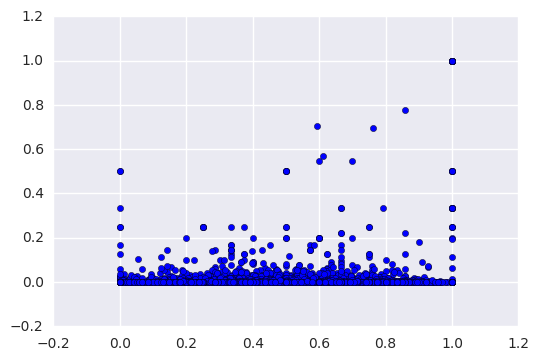

In [551]:
plt.scatter(X_train[:, -1], y_train)

In [580]:
import statsmodels.api as sm

In [581]:
X = np.append(arr=np.ones((len(X[:,0]), 1)).astype(int), values = X, axis=1)
X_opt = X

In [582]:
y

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ..., 
       [ 0.00060343],
       [ 0.00073382],
       [ 0.00124287]])

In [592]:
regressor_summary = sm.OLS(endog = y, exog = X_opt)

In [584]:
regressor_summary = regressor_summary.fit()

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s